# data preparision for qMRI and mask segmentation 
## env:DL_recon
## Version:  
    v0: 20230216
## xing lu@ UCSD

In [1]:
import pandas as pd
import glob2
import os
import cv2
import sys
from matplotlib import pylab as plt
import numpy as np
from tqdm import tqdm
import shutil
import json
import scipy.io as sio
import nibabel as nib

In [2]:
data_pth = r'/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50'
file = glob2.glob(data_pth+'/*.mat')

In [3]:
len(file)

20

In [4]:
df = pd.DataFrame({'file_pth':file})

In [5]:
df.head()

,file_pth
0,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...
1,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...
2,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...
3,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...
4,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...


In [6]:
df['ID'] = df.apply(lambda x:os.path.split(x['file_pth'])[-1].split('_50')[0],axis=1)

In [7]:
df.head()

,file_pth,ID
0,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...,conesT1_19_17408
1,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...,conesT1_20_06144
2,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...,conesT1_20_18944
3,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...,conesT1_20_23040
4,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...,conesT1_20_25088


In [8]:
label_path = r'/mnt/data2/DLProjects/DL_CSdata_Unet/T1/100'

In [9]:
df['label_path']=df.apply(lambda x:os.path.join(label_path,x['ID']+'_100.mat'),axis=1)

In [10]:
df['label_path'][1]

'/mnt/data2/DLProjects/DL_CSdata_Unet/T1/100/conesT1_20_06144_100.mat'

## image observation

In [11]:
example = df['file_pth'][0]

In [12]:
test_data=sio.loadmat(example)

In [13]:
test_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'recon_cs', 'img_recon', 'header_full', 'hdr'])

In [14]:
test_data['recon_cs']

array([[[ 1416.1782   -661.48505j ,  1145.882    -558.8696j  ,
         -1262.1438  -1089.2498j  , ...,  -462.80096 -1889.4313j  ,
           333.23187  +601.4374j  ,  1522.5159   +409.16263j ],
        [ 1050.7344   -273.4387j  ,   154.65506 -1006.92993j ,
          -479.84824  -200.92744j , ...,  -111.589   -2421.1292j  ,
          1141.5408   +186.52788j ,   431.363    -490.07224j ],
        [ 1248.647    +264.12433j ,  -411.93826 -1926.5089j  ,
          -695.0212   -959.4077j  , ...,  1652.7432    -79.84524j ,
          1585.4146   -975.387j   ,   574.43744  +582.8401j  ],
        ...,
        [  287.84277  +278.86795j ,  1057.597     -26.091305j,
          1103.4025   +906.38153j , ...,   531.11115  +371.5985j  ,
          -632.1141   +415.54065j ,   232.5224   +478.65894j ],
        [   55.695744  -86.5904j  ,  1039.2108   -326.04153j ,
           822.32056  +904.53204j , ...,  1541.4415   +438.06708j ,
          -301.35324   +54.21937j ,  -122.97177   +68.30956j ],
        [  1

In [15]:
test_data['img_recon'].shape

(256, 256, 32)

In [24]:
data_pth_lst = []
ID_lst = []
image_ID_lst = []
image_pth_lst = []


data_split_base = r'/mnt/data2/DLProjects/DL_CSdata_Unet/data_prepare'

if not os.path.exists(data_split_base):
    os.makedirs(data_split_base)

for idx,pth in enumerate(df['file_pth']):
    data = sio.loadmat(pth)['img_recon']
    print(data.shape)
    
    label = sio.loadmat(df.iloc[idx]['label_path'])['img_recon']
    
    data_id = df.iloc[idx]['ID']
    
    x,y,z = data.shape
    
    print('file id, x,y,z = ', data_id,x,y,z)
    
    for i in tqdm(range(z)):
        
        image_id = data_id +'_'+ str(i)
        image_pth = os.path.join(data_split_base, image_id  + '.mat')
        data_split = data[:,:,i]
        label_split = label[:,:,i]
        
#         print(image_pth)
        
        sio.savemat(image_pth,{'recon':data_split,
                               'label':label_split,
                               'recon_factor':50})
        
        image_ID_lst.append(image_id)
        image_pth_lst.append(image_pth)
        
        data_pth_lst.append(pth)
        ID_lst.append(data_id)

  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_19_17408 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_06144 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_18944 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_23040 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_25088 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_34304 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_37376 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_49152 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_51712 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_55808 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_65024 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_66560 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_70144 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_78848 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_87552 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_89088 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_90112 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_92672 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_96768 256 256 32


  0%|          | 0/32 [00:00<?, ?it/s]

(256, 256, 32)
file id, x,y,z =  conesT1_20_97280 256 256 32


100%|██████████| 32/32 [00:00<00:00, 164.62it/s]


In [17]:
image_df = pd.DataFrame({
    'ID':ID_lst,
    'data_pth':data_pth_lst,
    'image_ID':image_ID_lst,
    'image_pth':image_pth_lst
})


In [19]:
all_set = set(image_df['ID'])
total_num = len(df)
select_set = np.random.choice(list(all_set),round(total_num/10),replace = False)
all_set,select_set

({'conesT1_19_17408',
  'conesT1_20_06144',
  'conesT1_20_18944',
  'conesT1_20_23040',
  'conesT1_20_25088',
  'conesT1_20_34304',
  'conesT1_20_37376',
  'conesT1_20_49152',
  'conesT1_20_51712',
  'conesT1_20_55808',
  'conesT1_20_65024',
  'conesT1_20_66560',
  'conesT1_20_70144',
  'conesT1_20_78848',
  'conesT1_20_87552',
  'conesT1_20_89088',
  'conesT1_20_90112',
  'conesT1_20_92672',
  'conesT1_20_96768',
  'conesT1_20_97280'},
 array(['conesT1_20_18944', 'conesT1_20_65024'], dtype='<U16'))

,ID,data_pth,image_ID,image_pth,valid
0,conesT1_19_17408,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...,conesT1_19_17408_0,/mnt/data2/DLProjects/DL_CSdata_Unet/data_prep...,0
1,conesT1_19_17408,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...,conesT1_19_17408_1,/mnt/data2/DLProjects/DL_CSdata_Unet/data_prep...,0
2,conesT1_19_17408,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...,conesT1_19_17408_2,/mnt/data2/DLProjects/DL_CSdata_Unet/data_prep...,0
3,conesT1_19_17408,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...,conesT1_19_17408_3,/mnt/data2/DLProjects/DL_CSdata_Unet/data_prep...,0
4,conesT1_19_17408,/mnt/data2/DLProjects/DL_CSdata_Unet/T1/50/con...,conesT1_19_17408_4,/mnt/data2/DLProjects/DL_CSdata_Unet/data_prep...,0


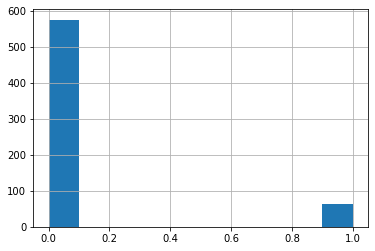

In [20]:
image_df['valid']=image_df.apply(lambda x: 1 if x['ID'] in set(select_set) else 0, axis =1)

image_df.valid.hist()

image_df.head()

In [21]:
image_df.to_csv('UTE_DLrecon_50.csv')

In [23]:
image_df.iloc[1]['image_pth']

'/mnt/data2/DLProjects/DL_CSdata_Unet/data_prepare/conesT1_19_17408_1.mat'